## 1. Rick - Round 1

Document code using comments, so we can all understand the code easily:

In [1]:
# Describe every piece of code with comments

### 1.1 Import dependencies for this notebook

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from statsmodels.tsa.arima.model import ARIMA

### 1.2 Missing data heatmap

In [15]:
# Store train set in pandas dataframe
myLabels = pd.DataFrame.from_records(json.load(open('../data/train.json'))).fillna("")

# Print first 5 rows
myLabels.head()

#myLabels['ENTRYTYPE'].unique()

,ENTRYTYPE,title,editor,year,publisher,author,abstract
0,inproceedings,Philippine Language Resources: Trends and Dire...,,2009,Association for Computational Linguistics,"[Roxas, Rachel Edita, Cheng, Charibeth, Lim, N...",
1,inproceedings,A System for Translating Locative Prepositions...,,1991,Association for Computational Linguistics,"[Japkowicz, Nathalie, Wiebe, Janyce M.]",
2,inproceedings,Introduction to the Shared Task on Comparing S...,,2008,College Publications,"[Bos, Johan]",
3,inproceedings,Pynini: A Python library for weighted finite-s...,,2016,Association for Computational Linguistics,"[Gorman, Kyle]",
4,inproceedings,Improving Readability of Swedish Electronic He...,,2014,Association for Computational Linguistics,"[Grigonyte, Gintarė, Kvist, Maria, Velupillai,...",


### 1.3 Model comparison

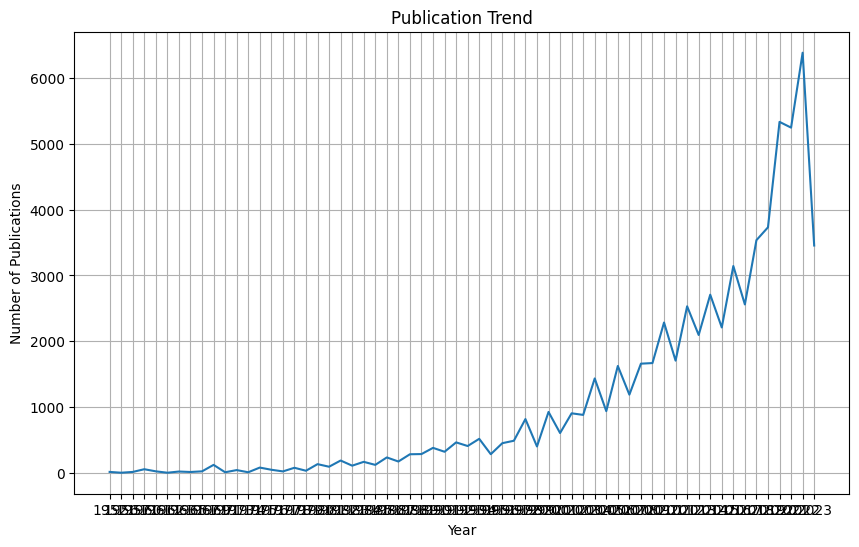

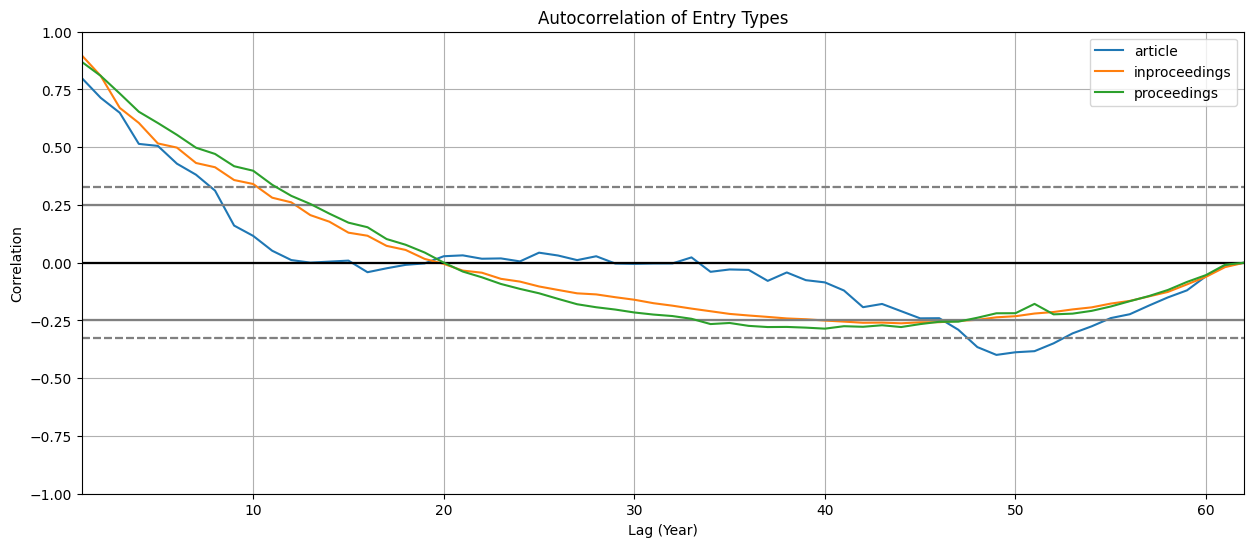

In [22]:
publication_count = myLabels['year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.plot(publication_count.index, publication_count.values)
plt.title('Publication Trend')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()


entrytype_count = myLabels.groupby(['year', 'ENTRYTYPE']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 6))

for entrytype in entrytype_count.columns:
    pd.plotting.autocorrelation_plot(entrytype_count[entrytype], label=entrytype)

plt.title('Autocorrelation of Entry Types')
plt.xlabel('Lag (Year)')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()
